In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.special
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import scipy

In [2]:
a = 303.0
sigma_a = 4.0
pec_vel = 627

print(np.sqrt(2)*a, np.sqrt(2)*sigma_a)

428.50670939904785 5.656854249492381


In [3]:
def cumul_distro(x,a):
    y = scipy.special.erf(x/(a*np.sqrt(2)))
    y = y - np.sqrt(2.0/np.pi) * x * np.exp(-0.5*(x/a)**2)/a
    return y

def distro(x,a):
    y = np.sqrt(2.0/np.pi) * x**2 * np.exp(-0.5*(x/a)**2)/a**3
    return y

In [4]:
x = np.linspace(0,1300,100)

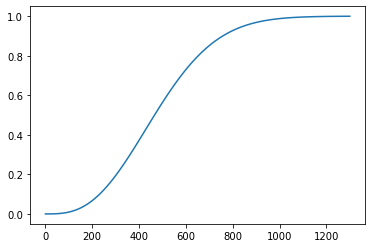

In [5]:
plt.plot(x, cumul_distro(x,a))

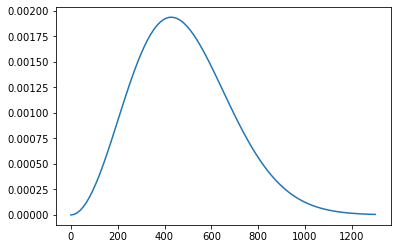

In [6]:
plt.plot(x, distro(x,a))

In [7]:
print(distro(pec_vel,a)/distro(np.sqrt(2)*a,a))
print(np.exp(-0.5*(0.9/1)**2)/np.exp(-0.5*((0/1)**2)))

0.6840424533256633
0.6669768108584744


In [8]:
n_iteration = 100000
a_values = np.random.normal(loc=a,scale=sigma_a, size=n_iteration)
frac = np.ones(n_iteration)
for i in range(n_iteration):
    limit_vel = np.random.normal(loc=pec_vel, scale=22)
    #print(limit_vel)
    #limit_vel = pec_vel
    frac[i] = 1-cumul_distro(limit_vel, a_values[i])

(array([2.0000e+00, 1.9000e+01, 6.8000e+01, 1.9300e+02, 4.3900e+02,
        1.0680e+03, 2.0410e+03, 3.3590e+03, 5.2830e+03, 7.1590e+03,
        8.9990e+03, 1.0341e+04, 1.1026e+04, 1.0815e+04, 9.8330e+03,
        8.2240e+03, 6.7110e+03, 4.9760e+03, 3.5850e+03, 2.3950e+03,
        1.5510e+03, 8.4400e+02, 5.3000e+02, 2.6700e+02, 1.4100e+02,
        7.3000e+01, 2.9000e+01, 1.8000e+01, 6.0000e+00, 5.0000e+00]),
 array([0.120883  , 0.12948161, 0.13808021, 0.14667882, 0.15527742,
        0.16387603, 0.17247463, 0.18107324, 0.18967184, 0.19827045,
        0.20686905, 0.21546766, 0.22406626, 0.23266487, 0.24126347,
        0.24986208, 0.25846068, 0.26705929, 0.27565789, 0.2842565 ,
        0.2928551 , 0.30145371, 0.31005231, 0.31865092, 0.32724952,
        0.33584813, 0.34444673, 0.35304534, 0.36164394, 0.37024255,
        0.37884115]),
 <BarContainer object of 30 artists>)

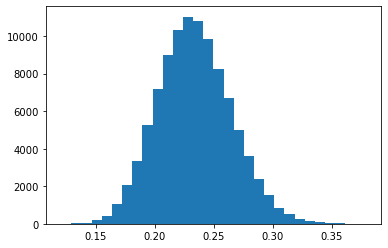

In [9]:
plt.hist(frac, bins=30)

In [10]:
print(np.mean(frac), np.std(frac))

0.2338106917550425 0.031123144643262914


In [11]:
v = np.array([79.39,77.33,84.09,161.47, 164.65, 169.06, 225.01, 228.01, 231.17,
     236.16, 230.26, 287.90, 280.57, 283.48, 288.06, 296.87 , 293.44,
     274.61, 279.81 , 280.67, 279.11, 281.28, 285.81, 285.14 , 286.30, 
     289.23, 278.45, 277.81, 274.83, 277.62, 277.66])
len(v)
L = np.array([51.7, 51.7, 51.7, 110.7, 110.7, 110.7, 302.6, 302.6, 302.6, 
             357.14, 357.14, 1074.62, 1074.62, 1074.62, 1074.62, 1074.62, 
            1074.62, 1074.62, 1074.62, 1074.62, 1074.62, 1074.62, 1074.62,
            1074.62, 1074.62, 1074.62, 1074.62, 1074.62, 1074.62, 1074.62, 1074.62])
x = 1/L
y = v

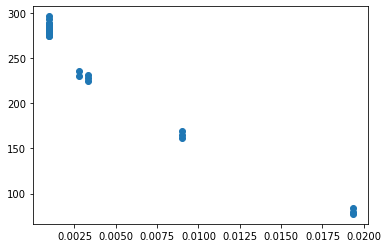

In [12]:
plt.scatter(x, y)

In [13]:
def component(x,a, b):
    y = a * np.exp(-b*x)
    return y

In [14]:
n_iterations = 10000
a_values = np.ones(n_iterations)
s_values = np.ones(n_iterations)
for i in range(n_iterations):
    l = np.arange(len(x))
    ii = np.random.choice(l, size=len(l))
    popt, pcov = curve_fit(component, x[ii], y[ii])
    a_values[i] = popt[0]
    s_values[i] = np.sqrt(pcov[0,0])

299.91723842947977 1.7845216949842841


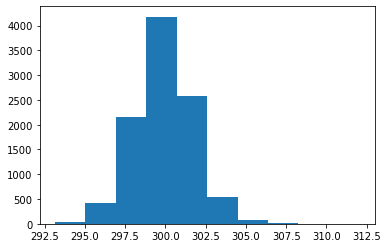

In [15]:
plt.hist(a_values)
print(np.mean(a_values), np.std(a_values))

1.9452410251108354 0.2931070268414429


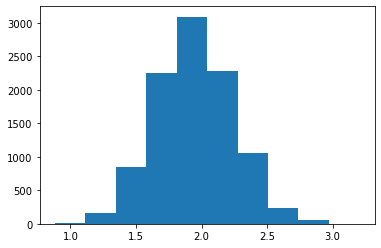

In [16]:
plt.hist(s_values)
print(np.mean(s_values), np.std(s_values))

In [120]:
def theory_distro(x,a,b,c):
    y = a/(1+(x/b)**c)
    return y

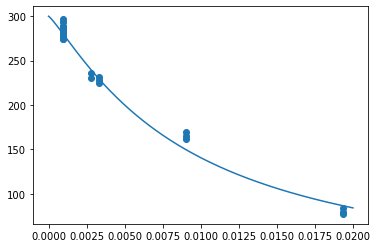

In [131]:
x_theory = np.linspace(0,0.020,1000)
y_theory = theory_distro(x_theory, 300,0.009, 1.18)
plt.plot(x_theory, y_theory)
plt.scatter(x, y)

In [132]:
from scipy.optimize import curve_fit

[3.00581972e+02 9.26395540e-03 1.18984915e+00] 4.838980158413354 0.0004472535768573412 0.07800909836789438


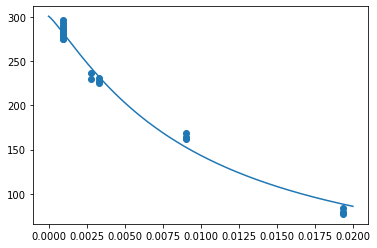

In [139]:
popt, pcov = curve_fit(theory_distro, x, y, p0=[310,0.01,1.0], bounds=[[250,0.001,1.0],[320, 0.020, 4.0]])
y_theory = theory_distro(x_theory, popt[0], popt[1], popt[2])
plt.plot(x_theory, y_theory)
plt.scatter(x, y)
print(popt, np.sqrt(pcov[0,0]), np.sqrt(pcov[1,1]), np.sqrt(pcov[2,2]))

In [140]:
y_theory[:2]

array([300.58197233, 300.37951787])